In [22]:
import pandas as pd
import chardet
from bokeh.layouts import row, column
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Slider, Select, HoverTool, Div, Tabs, TabPanel
from bokeh.io import output_notebook

def KPI(text:str):
    return Div(text=f"""
    <div style="background-color: #f0f0f0; padding: 10px; border-radius: 5px;">
    <h1>{text}</h1>
    </div>
    """)
    
output_notebook()

Loading BokehJS ...

In [5]:
def detect_encoding(file_path: str) -> str:
    with open(file_path, 'rb') as file:
        detector = chardet.universaldetector.UniversalDetector()
        for line in file:
            detector.feed(line)
            if detector.done:
                break
        detector.close()
    return detector.result['encoding']

In [6]:
product_id = "com.vansteinengroentjes.apps.ddfive"

In [7]:
import glob
data_path = 'data/'
csv_files = glob.glob(data_path + '*.csv')

# Initialize an empty list to store dataframes
dataframes = []

reviews_df = pd.DataFrame()
sales_df = pd.DataFrame()
crashes_df = pd.DataFrame()
ratings_overview_df = pd.DataFrame()
ratings_country_df = pd.DataFrame()

# encodings = ['utf-8', 'utf-16 LE']

# Loop through the CSV files and read them into dataframes
for file in csv_files:
    # print(file)
    encoding = detect_encoding(file) 
    # for encoding in encodings:
    try:
        df = pd.read_csv(file, encoding=encoding)
        if "reviews" in file:
            # print(file + " " + encoding + " " + str(df.shape))
            reviews_df = pd.concat([reviews_df, df], ignore_index=True)
        elif "sales" in file:
            # print(file + " " + encoding + " " + str(df.shape))

            df.columns = df.columns.str.strip().str.lower()
            # rename colums
            if "order number" in df.columns: 
                df.rename(columns={"order number": "description"}, inplace=True)
            
            if "order charged date" in df.columns: 
                df.rename(columns={"order charged date": "transaction date"}, inplace=True)
            
            if "order charged timestamp" in df.columns: 
                df.rename(columns={"order charged timestamp": "transaction time"}, inplace=True)

            if "country of buyer" in df.columns: 
                df.rename(columns={"country of buyer": "buyer country"}, inplace=True)

            if "state of buyer" in df.columns: 
                df.rename(columns={"state of buyer": "buyer state"}, inplace=True)
            
            if "postal code of buyer" in df.columns: 
                df.rename(columns={"postal code of buyer": "buyer postal code"}, inplace=True)

            if "device model" in df.columns:
                df.rename(columns={"device model": "hardware"}, inplace=True)

            if "currency of sale" in df.columns:
                df.rename(columns={"currency of sale": "buyer currency"}, inplace=True)

            if "item price" in df.columns: 
                df.rename(columns={"item price": "amount (buyer currency)"}, inplace=True)

            


            sales_df = pd.concat([sales_df, df], ignore_index=True)
        elif "crashes" in file:
            # print(file + " " + encoding + " " + str(df.shape))
            crashes_df = pd.concat([crashes_df, df], ignore_index=True)
        elif "ratings" in file:
            if "overview" in file:
                # print(file + " " + encoding + " " + str(df.shape))
                ratings_overview_df = pd.concat([ratings_overview_df, df], ignore_index=True)
            elif "country" in file:
                # print(file + " " + encoding + " " + str(df.shape))
                ratings_country_df = pd.concat([ratings_country_df, df], ignore_index=True)
    except UnicodeDecodeError:
        pass
    

print(len(reviews_df))
print(len(sales_df))
print(len(crashes_df))
print(len(ratings_overview_df))
print(len(ratings_country_df))

print(sales_df.columns.tolist())
display(sales_df)



78
3487
214
214
18617
['description', 'transaction date', 'transaction time', 'tax type', 'transaction type', 'refund type', 'product title', 'product id', 'product type', 'sku id', 'hardware', 'buyer country', 'buyer state', 'buyer postal code', 'buyer currency', 'amount (buyer currency)', 'currency conversion rate', 'merchant currency', 'amount (merchant currency)', 'base plan id', 'offer id', 'financial status', 'taxes collected', 'charged amount', 'city of buyer']


,description,transaction date,transaction time,tax type,transaction type,refund type,product title,product id,product type,sku id,...,amount (buyer currency),currency conversion rate,merchant currency,amount (merchant currency),base plan id,offer id,financial status,taxes collected,charged amount,city of buyer
0,GPA.3314-3067-8984-86281,"Sep 1, 2021",1:09:37 AM PDT,NaN,Charge,NaN,DM Tools (Complete Reference for DnD 5),com.vansteinengroentjes.apps.ddfive,1,premium,...,2.08,1.00000,EUR,2.08,NaN,NaN,NaN,NaN,NaN,NaN
1,GPA.3311-2378-8945-03309,"Sep 1, 2021",8:35:27 AM PDT,NaN,Charge,NaN,DM Tools (Complete Reference for DnD 5),com.vansteinengroentjes.apps.ddfive,1,premium,...,3.49,0.84440,EUR,2.95,NaN,NaN,NaN,NaN,NaN,NaN
2,GPA.3311-2378-8945-03309,"Sep 1, 2021",8:35:27 AM PDT,NaN,Google fee,NaN,DM Tools (Complete Reference for DnD 5),com.vansteinengroentjes.apps.ddfive,1,premium,...,-0.52,0.84440,EUR,-0.44,NaN,NaN,NaN,NaN,NaN,NaN
3,GPA.3303-4045-0553-92783,"Sep 1, 2021",12:27:40 PM PDT,NaN,Charge,NaN,DM Tools (Complete Reference for DnD 5),com.vansteinengroentjes.apps.ddfive,1,premium,...,1.84,1.16340,EUR,2.14,NaN,NaN,NaN,NaN,NaN,NaN
4,GPA.3359-6962-8916-33548,"Sep 1, 2021",2:11:11 PM PDT,NaN,Charge,NaN,Character Manager (Complete Reference for DnD 5),com.vansteinengroentjes.apps.ddfive,1,unlockcharactermanager,...,5.49,0.84475,EUR,4.64,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,GPA.3371-8563-4424-08833,"Jul 31, 2021",9:13:33 PM PDT,NaN,Google fee,NaN,Character Manager (Complete Reference for DnD 5),com.vansteinengroentjes.apps.ddfive,1,unlockcharactermanager,...,-0.82,0.84265,EUR,-0.69,NaN,NaN,NaN,NaN,NaN,NaN
3483,GPA.3366-5335-7447-64180,"Jul 31, 2021",9:30:11 PM PDT,NaN,Charge,NaN,DM Tools (Complete Reference for DnD 5),com.vansteinengroentjes.apps.ddfive,1,premium,...,3.49,0.84265,EUR,2.94,NaN,NaN,NaN,NaN,NaN,NaN
3484,GPA.3366-5335-7447-64180,"Jul 31, 2021",9:30:11 PM PDT,NaN,Google fee,NaN,DM Tools (Complete Reference for DnD 5),com.vansteinengroentjes.apps.ddfive,1,premium,...,-0.52,0.84265,EUR,-0.44,NaN,NaN,NaN,NaN,NaN,NaN
3485,GPA.3386-7086-1527-85919,"Jul 31, 2021",10:19:14 PM PDT,NaN,Charge,NaN,Character Manager (Complete Reference for DnD 5),com.vansteinengroentjes.apps.ddfive,1,unlockcharactermanager,...,5.49,0.84265,EUR,4.63,NaN,NaN,NaN,NaN,NaN,NaN


# Sales data

In [8]:
# Clean sales data
# sales_df.columns = sales_df.columns.str.strip().str.lower()

df = sales_df[sales_df['product id'] == product_id].copy()
# df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])
# df["Amount (Merchant Currency) Google tax"] = df["Amount (Merchant Currency)"]

# The data format varies across formats
def parse_datetime(row):
    """
    Convert transaction_date and transaction_time into a single datetime column.
    Handles both:
    - Format 1: "Jun 1, 2021" + "12:15:21 PM PDT"
    - Format 2: "2021-12-31" + "1640956762" (Unix timestamp)
    """
    try:
        # Convert date
        date_str = str(row["transaction date"]).strip()
        if "," in date_str:  # "Jun 1, 2021" format
            date_parsed = pd.to_datetime(date_str, format="%b %d, %Y", errors="coerce")
        else:  # "2021-12-31" format
            date_parsed = pd.to_datetime(date_str, format="%Y-%m-%d", errors="coerce")

        # Convert time
        time_str = str(row["transaction time"]).strip()
        if time_str.isdigit():  # Unix timestamp case
            time_parsed = pd.to_datetime(int(time_str), unit="s", errors="coerce").time()
        else:  # Regular time format
            time_parsed = pd.to_datetime(time_str.replace(" PDT", ""), format="%I:%M:%S %p", errors="coerce").time()

        # Combine date and time
        if pd.notna(date_parsed) and pd.notna(time_parsed):
            return pd.Timestamp.combine(date_parsed, time_parsed)
        else:
            return pd.NaT  # Return NaT if invalid
    
    except Exception as e:
        print(f"Error parsing row {row}: {e}")
        return pd.NaT  # Return NaT for errors
    
from currency_converter import CurrencyConverter
c = CurrencyConverter(fallback_on_missing_rate=True)

def convert_currency(row):
    """
    Convert 'amount (buyer currency)' into 'amount (merchant currency)' 
    if 'amount (merchant currency)' is NaN.
    """
    try:
        # Check if merchant amount is NaN and buyer amount is not NaN
        if pd.isna(row["amount (merchant currency)"]) and pd.notna(row["amount (buyer currency)"]):
            # Perform conversion using the CurrencyConverter package
            return c.convert(row["amount (buyer currency)"], row["buyer currency"], "EUR", row["datetime"].date())
        else:
            return row["amount (merchant currency)"]
    except Exception as e:
        print(f"Error converting currency for row {row['description']}: {e}")
        return row["amount (merchant currency)"]


def clean_sales_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean and process sales data by combining charge and fee rows.
    
    Args:
        df (pd.DataFrame): Input DataFrame with sales data
        
    Returns:
        pd.DataFrame: Cleaned DataFrame with combined transactions
    """
    # Create a copy of the input DataFrame to avoid the SettingWithCopyWarning
    df = df.copy()

    df["datetime"] = df.apply(parse_datetime, axis=1)
    
    # # Convert date and time to datetime, properly handling PDT timezone
    # df['datetime'] = pd.to_datetime(
    #     df['transaction date'] + ' ' + df['transaction time'].str.replace(' PDT', '')
    # )
 
    # Fill NaN values using Currency Converter
    df["amount (merchant currency)"] = df.apply(convert_currency, axis=1)
    
    def combine_transactions(group):
        """Combine charge and fee rows into a single transaction"""
        if len(group) == 2 and set(group['transaction type']) == {'Charge', 'Google fee'}:
            charge_row = group[group['transaction type'] == 'Charge'].iloc[0]
            fee_row = group[group['transaction type'] == 'Google fee'].iloc[0]
            
            # Calculate net amounts
            net_buyer_amount = charge_row['amount (buyer currency)'] + fee_row['amount (buyer currency)']
            net_merchant_amount = charge_row['amount (merchant currency)'] + fee_row['amount (merchant currency)']
            
            # Create result row
            result = charge_row.copy()
            result['amount (buyer currency)'] = net_buyer_amount
            result['amount (merchant currency)'] = net_merchant_amount
            result['transaction type'] = 'Net Charge'
            return result
        
        return group.iloc[0]

    # Columns to keep in the final output
    columns_to_keep = [
        'description', 'datetime', 'product title', 
        'product id', 'sku id', 'buyer country',
        'buyer currency', 'amount (buyer currency)',
        'merchant currency', 'amount (merchant currency)'
    ]
    
    # Group and combine transactions
    result_df = (df.groupby('description', as_index=False)
                  .apply(combine_transactions)
                  [columns_to_keep]
                  .sort_values('datetime')
                  .reset_index(drop=True))
    
    return result_df

# Example usage
cleaned_df = clean_sales_data(df)
display(cleaned_df)

# duplicates = cleaned_df[cleaned_df.duplicated("Description", keep=False)]
# print("Duplicates:")
# print(duplicates)



Error converting currency for row GPA.3313-3300-8778-25902: COP is not a supported currency
Error converting currency for row GPA.3313-3300-8778-25902: COP is not a supported currency
Error converting currency for row GPA.3384-8046-7908-11492: CRC is not a supported currency
Error converting currency for row GPA.3394-7011-7992-67654: CRC is not a supported currency


/var/folders/bl/0xp3c78j1gs_14t9fbtq2g3m0000gn/T/ipykernel_20843/4189381696.py:113: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(combine_transactions)


,description,datetime,product title,product id,sku id,buyer country,buyer currency,amount (buyer currency),merchant currency,amount (merchant currency)
0,GPA.3370-7096-7934-01916,2021-06-01 17:38:09,Character Manager (Complete Reference for DnD 5),com.vansteinengroentjes.apps.ddfive,unlockcharactermanager,US,USD,3.84,EUR,3.140000
1,GPA.3301-2849-0660-49349,2021-06-01 22:46:39,DM Tools (Complete Reference for DnD 5),com.vansteinengroentjes.apps.ddfive,premium,US,USD,2.44,EUR,2.000000
2,GPA.3372-1497-1097-13226,2021-06-02 07:51:43,Character Manager (Complete Reference for DnD 5),com.vansteinengroentjes.apps.ddfive,unlockcharactermanager,US,USD,3.84,EUR,3.160000
3,GPA.3397-6490-8608-67650,2021-06-02 09:14:16,Character Manager (Complete Reference for DnD 5),com.vansteinengroentjes.apps.ddfive,unlockcharactermanager,US,USD,3.84,EUR,3.150000
4,GPA.3378-4840-7906-77859,2021-06-02 10:32:52,DM Tools (Complete Reference for DnD 5),com.vansteinengroentjes.apps.ddfive,premium,US,USD,2.44,EUR,2.000000
...,...,...,...,...,...,...,...,...,...,...
1698,GPA.3358-8615-1171-80349,2021-12-31 13:19:22,DM Tools (Complete Reference for DnD 5),com.vansteinengroentjes.apps.ddfive,premium,US,USD,3.49,NaN,3.081406
1699,GPA.3397-7418-5342-99790,2021-12-31 13:19:57,Character Manager (Complete Reference for DnD 5),com.vansteinengroentjes.apps.ddfive,unlockcharactermanager,US,USD,5.49,NaN,4.847254
1700,GPA.3333-5146-4957-35294,2021-12-31 19:01:21,DM Tools (Complete Reference for DnD 5),com.vansteinengroentjes.apps.ddfive,premium,GB,GBP,2.16,NaN,2.570572
1701,GPA.3306-0097-9714-42420,2021-12-31 22:27:39,DM Tools (Complete Reference for DnD 5),com.vansteinengroentjes.apps.ddfive,premium,US,USD,3.49,NaN,3.081406


## Sales over time

In [9]:
output_notebook()

def plot_sales_all(df):
    grouped_by_transaction = df.groupby(pd.Grouper(key="datetime", freq='1D'))["amount (merchant currency)"].sum().reset_index()
    grouped_by_count = df.groupby(pd.Grouper(key="datetime", freq='1D')).count().reset_index()
    p = figure(title="Simple line example",x_axis_type="datetime", x_axis_label='date', y_axis_label='sales')
    p.line(grouped_by_transaction["datetime"], grouped_by_transaction["amount (merchant currency)"], legend_label="Sales prices", line_width=2)
    p.line(grouped_by_count["datetime"], grouped_by_count["amount (merchant currency)"], legend_label="Sales volume", line_width=2, color="red")
    # show(p)
    return p

def plot_sales_filtered(df):
    filtered_df = df[df["sku id"] == "premium"]
    grouped_by_transaction = filtered_df.groupby(pd.Grouper(key="datetime", freq='1D'))["amount (merchant currency)"].sum().reset_index()
    grouped_by_count = filtered_df.groupby(pd.Grouper(key="datetime", freq='1D')).count().reset_index()
    p = figure(title="Premium",x_axis_type="datetime", x_axis_label='date', y_axis_label='sales')
    p.line(grouped_by_transaction["datetime"], grouped_by_transaction["amount (merchant currency)"], legend_label="Sales prices", line_width=2)
    p.line(grouped_by_count["datetime"], grouped_by_count["amount (merchant currency)"], legend_label="Sales volume", line_width=2, color="red")
    # show(p)
    return p

layout = row(plot_sales_all(cleaned_df.copy()), plot_sales_filtered(cleaned_df.copy()))  # Stacks vertically
show(layout)

Loading BokehJS ...

In [ ]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.layouts import column, row
from bokeh.models import Select, ColumnDataSource, CustomJS

output_notebook()

df = cleaned_df.copy()

def create_daily_metrics(sku_id):
    filtered_df = df[df["sku id"] == sku_id]
    sums = filtered_df.groupby(pd.Grouper(key="datetime", freq='1D'))["amount (merchant currency)"].sum().reset_index()
    counts = filtered_df.groupby(pd.Grouper(key="datetime", freq='1D')).count().reset_index()
    return sums, counts

premium_sums, premium_counts = create_daily_metrics("premium")
unlock_sums, unlock_counts = create_daily_metrics("unlockcharactermanager")

# Create ColumnDataSources
premium_source = ColumnDataSource({
    'date': premium_sums['datetime'],
    'sum': premium_sums['amount (merchant currency)'],
    'count': premium_counts['amount (merchant currency)']
})
unlock_source = ColumnDataSource({
    'date': unlock_sums['datetime'],
    'sum': unlock_sums['amount (merchant currency)'],
    'count': unlock_counts['amount (merchant currency)']
})

# Create figure
p = figure(width=800, height=400, x_axis_type="datetime",
          title="Product Revenue Analysis")
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Value'

# Create lines for both metrics
premium_line = p.line('date', 'sum', line_color='blue', 
                     legend_label='Premium', source=premium_source)
unlock_line = p.line('date', 'sum', line_color='red', 
                    legend_label='Character Manager', source=unlock_source)

# Create Select widgets
product_select = Select(title="Product Type", 
                       options=["Both", "Premium Only", "Character Manager Only"],
                       value="Both")

metric_select = Select(title="Metric Type",
                      options=["Revenue", "Count"],
                      value="Revenue")

# Create JavaScript callback
callback = CustomJS(args=dict(premium_line=premium_line,
                            unlock_line=unlock_line,
                            premium_source=premium_source,
                            unlock_source=unlock_source,
                            product_select=product_select,
                            metric_select=metric_select), 
                   code="""
    const product = product_select.value;
    const metric = metric_select.value;
    
    // Update y-values based on metric
    const field = metric === "Revenue" ? "sum" : "count";
    premium_line.glyph.y = {field: field};
    unlock_line.glyph.y = {field: field};
    
    // Update visibility based on product selection
    if (product === "Both") {
        premium_line.visible = true;
        unlock_line.visible = true;
    } else if (product === "Premium Only") {
        premium_line.visible = true;
        unlock_line.visible = false;
    } else {
        premium_line.visible = false;
        unlock_line.visible = true;
    }
""")

# Attach callbacks
product_select.js_on_change('value', callback)
metric_select.js_on_change('value', callback)

# Show the plot
revenue = column(row(product_select, metric_select), p)
show(revenue)

Loading BokehJS ...

In [ ]:
df = cleaned_df.copy()

# count the number of sales per month per country:
df['month'] = df['datetime'].dt.to_period('M')
monthly_sales = df.groupby(['month', 'buyer country']).size().unstack().fillna(0)

# total sales per country:
total_sales = monthly_sales.sum()

# get last month sales:
last_month_sales = monthly_sales.iloc[-1]

# get last 3 months sales:
last_3_months_sales = monthly_sales.iloc[-3:].sum()

#filter only the last 6 months:
monthly_sales = monthly_sales.iloc[-6:]

# calculate growth rate per country over the last 6 months:
growth_rate = monthly_sales.pct_change(axis=0).fillna(0)
# remove infinite values:
growth_rate = growth_rate.replace([float('-inf'), float('inf')], 0)

# get the mean growth rate per country over the entire period:
mean_growth_rate = growth_rate.mean()

# # combine growth rate and total sales:
mean_growth_rate = pd.concat([mean_growth_rate, last_month_sales, last_3_months_sales, total_sales], axis=1)
# growth_rate
mean_growth_rate.columns = ['Growth', 'last month sales', 'last 3 months sales', 'total sales']
# sort by mean growth rate:
mean_growth_rate = mean_growth_rate.sort_values('Growth', ascending=False)
mean_growth_rate["Growth"] = mean_growth_rate["Growth"].map("{:.2%}".format)
# add a ⬆ or ⬇ symbol to indicate growth rate:
mean_growth_rate["Growth"] = mean_growth_rate["Growth"].apply(lambda x: f"⬆ {x}" if float(x.replace("%", "")) > 0 else f"⬇ {x}")

code_to_name = pd.read_csv("./data/longlat.csv")
code_to_name = code_to_name[["country", "name"]]
# add country name as a column:
mean_growth_rate = mean_growth_rate.join(code_to_name.set_index("country"), on="buyer country")
mean_growth_rate = mean_growth_rate.reset_index()
mean_growth_rate = mean_growth_rate.rename(columns={"buyer country": "country code"})
mean_growth_rate = mean_growth_rate.rename(columns={"name": "buyer country"})

print(mean_growth_rate.head())

# shift columns to the left:
mean_growth_rate = mean_growth_rate[['buyer country', 'Growth', 'last month sales', 'last 3 months sales', 'total sales']]

# create a column data source: 
source = ColumnDataSource(mean_growth_rate.head(10))

# show with bokeh:
from bokeh.models import DataTable, TableColumn
from bokeh.models import HoverTool

columns = [TableColumn(field="buyer country", title="Country"),
              TableColumn(field="Growth", title="Growth Rate monthly average (%)"),
              TableColumn(field="last month sales", title="Last Month Sales"),
              TableColumn(field="last 3 months sales", title="Last 3 Months Sales"),
              TableColumn(field="total sales", title="Total Sales")]

# top country and growth over the last 6 months:
top_country = mean_growth_rate.iloc[0]["buyer country"]
top_growth = mean_growth_rate.iloc[0]["Growth"]
top_growth = f"{top_country} has the highest growth rate at {top_growth}"
KPIs = row(
    KPI(top_growth),
)

sales_growth_data_table = column(
    Div(text="<h2>Sales Growth Analysis over the last 6 months</h2>"),
    KPIs,
    DataTable(source=source, columns=columns, width=800, height=280)
)

show(column(revenue, sales_growth_data_table))

  country code    Growth  last month sales  last 3 months sales  total sales  \
0           NL  ⬆ 44.44%               5.0                 13.0         26.0   
1           IT  ⬆ 40.56%               1.0                  5.0         13.0   
2           DE  ⬆ 22.35%               5.0                 28.0         47.0   
3           GB  ⬆ 20.52%              11.0                 47.0        109.0   
4           CA  ⬆ 12.00%              11.0                 21.0         70.0   

    buyer country  
0     Netherlands  
1           Italy  
2         Germany  
3  United Kingdom  
4          Canada  


# Review data

In [11]:
import pandas as pd
from bokeh.models import Range1d, LinearAxis, RangeTool
from bokeh.layouts import column, row

# Clean ratings data
df_ratings = ratings_country_df.copy()
df_ratings["Date"] = pd.to_datetime(df_ratings["Date"])
df_ratings = df_ratings.groupby(pd.Grouper(key="Date", freq='1D'))["Total Average Rating"].mean()

# Clean crashes data
df_crash = crashes_df.copy()
df_crash["Date"] = pd.to_datetime(df_crash["Date"])
df_crash = df_crash.sort_values(by="Date")

# Normalize data for selection plot
ratings_normalized = (df_ratings - df_ratings.min()) / (df_ratings.max() - df_ratings.min())
crashes_normalized = (df_crash["Daily Crashes"] - df_crash["Daily Crashes"].min()) / (df_crash["Daily Crashes"].max() - df_crash["Daily Crashes"].min())

# create shared range for the x-axis
x_range = (df_ratings.index.min(), df_ratings.index.max())

# Create main plots with original values
p = figure(width=600, height=300, x_axis_type="datetime", x_range=x_range,
          tools="xpan", toolbar_location="above")
p.yaxis.axis_label = 'Rating'
p.line(df_ratings.index, df_ratings.values, line_color='blue')

p2 = figure(width=600, height=300, x_axis_type="datetime", x_range=p.x_range,
           tools="xpan", toolbar_location="above")
p2.yaxis.axis_label = 'Crashes'
p2.line(df_crash["Date"], df_crash["Daily Crashes"], line_color='red')

# Create selection plot with normalized values
select = figure(title="Drag to select time range",
                height=130, width=1200,
                x_axis_type="datetime", y_axis_type=None,
                tools="", toolbar_location=None,
                background_fill_color="#efefef")

# Add normalized lines to selection plot
select.line(df_ratings.index, ratings_normalized, line_color='blue')
select.line(df_crash["Date"], crashes_normalized, line_color='red')

# Configure RangeTool
range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "navy"
range_tool.overlay.fill_alpha = 0.2

select.ygrid.grid_line_color = None
select.add_tools(range_tool)

merged_df = pd.merge(df_crash, df_ratings, on='Date', suffixes=('_crash', '_rating'))


dates = pd.date_range(start=x_range[0], end=x_range[1], freq='D')

# from 0 to 1 based on the dates
dates = pd.DataFrame(dates, columns=["Date"])
dates["color"] = (dates["Date"] - dates["Date"].min()) / (dates["Date"].max() - dates["Date"].min())
dates["color"] = (dates["color"] * 255).astype(int)
dates["color"] = dates["color"].apply(lambda x: (x, 150, 150))

# make new plot with crashes vs ratings
p3 = figure(width=1200, height=400, x_axis_label='Crashes', y_axis_label='Rating')
p3.scatter(merged_df["Daily Crashes"], merged_df["Total Average Rating"], color=dates["color"], size=10, fill_alpha=0.6)

# calculate correlation
correlation = merged_df["Daily Crashes"].corr(merged_df["Total Average Rating"])

p3.title.text = f"Correlation: {correlation:.2f} | More red = more recent"


# Show the plots
review = column(
    row(
        KPI(f"Total crashes: {df_crash['Daily Crashes'].sum()}"),
        KPI(f"Crashes increased ⬆{df_crash['Daily Crashes'].pct_change().mean() * 100:.2f}%"),
        KPI(f"Average ratings: {df_ratings.mean().round(2)} ⭐️"),
        KPI(f"Correlation: {correlation:.2f}")
    ),
    row(p, p2), 
    select, 
    p3
)
show(review)

In [12]:
from bokeh.palettes import Category10

df_countryratings = ratings_country_df.copy()

df_countryratings["Date"] = pd.to_datetime(df_countryratings["Date"])
df_countryratings = df_countryratings.dropna(subset=["Total Average Rating"])

df_country_pivot = df_countryratings.pivot(index="Date", columns="Country", values="Total Average Rating")

p = figure(title="Total Average Rating Trend by Country", x_axis_type="datetime",
           width=900, height=500, tools="pan,wheel_zoom,box_zoom,reset,save")

colors = Category10[10]

for i, country in enumerate(df_country_pivot.columns[:10]):  # Limit to 10 countries for readability
    source = ColumnDataSource(data=dict(x=df_country_pivot.index, y=df_country_pivot[country]))
    p.line("x", "y", source=source, line_width=2, color=colors[i % len(colors)], legend_label=country)

p.xaxis.axis_label = "Date"
p.yaxis.axis_label = "Total Average Rating"
p.legend.title = "Country"
p.legend.location = "top_left"
p.legend.click_policy = "hide"  # Allows clicking legend to hide/show lines

# Add hover tool
hover = HoverTool(tooltips=[("Date", "@x{%F}"), ("Rating", "@y")], formatters={"@x": "datetime"})
p.add_tools(hover)


display(df_countryratings)
display(df_country_pivot)
show(p)


,Date,Package Name,Country,Daily Average Rating,Total Average Rating
0,2021-07-01,com.vansteinengroentjes.apps.ddfive,AR,NaN,4.20
1,2021-07-01,com.vansteinengroentjes.apps.ddfive,AT,NaN,3.83
2,2021-07-01,com.vansteinengroentjes.apps.ddfive,AU,NaN,4.19
3,2021-07-01,com.vansteinengroentjes.apps.ddfive,BA,NaN,5.00
4,2021-07-01,com.vansteinengroentjes.apps.ddfive,BD,NaN,5.00
...,...,...,...,...,...
18612,2021-09-30,com.vansteinengroentjes.apps.ddfive,US,NaN,4.03
18613,2021-09-30,com.vansteinengroentjes.apps.ddfive,UY,NaN,4.86
18614,2021-09-30,com.vansteinengroentjes.apps.ddfive,VE,NaN,4.00
18615,2021-09-30,com.vansteinengroentjes.apps.ddfive,VN,NaN,5.00


Country,AR,AT,AU,BA,BD,BE,BG,BH,BN,BR,...,SV,TH,TR,TW,UA,US,UY,VE,VN,ZA
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-01,4.2,3.91,4.19,5.0,5.0,3.70,5.0,5.0,5.0,4.35,...,5.0,5.0,4.71,4.0,4.75,4.04,4.86,4.0,5.0,4.35
2021-06-02,4.2,3.91,4.19,5.0,5.0,3.70,5.0,5.0,5.0,4.35,...,5.0,5.0,4.71,4.0,4.75,4.04,4.86,4.0,5.0,4.35
2021-06-03,4.2,3.91,4.19,5.0,5.0,3.70,5.0,5.0,5.0,4.35,...,5.0,5.0,4.71,4.0,4.75,4.04,4.86,4.0,5.0,4.35
2021-06-04,4.2,3.91,4.19,5.0,5.0,3.70,5.0,5.0,5.0,4.35,...,5.0,5.0,4.71,4.0,4.75,4.04,4.86,4.0,5.0,4.35
2021-06-05,4.2,3.91,4.19,5.0,5.0,3.70,5.0,5.0,5.0,4.35,...,5.0,5.0,4.71,4.0,4.75,4.04,4.86,4.0,5.0,4.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,4.2,3.83,4.18,5.0,5.0,3.70,5.0,5.0,5.0,4.34,...,5.0,5.0,4.72,4.0,4.75,4.03,4.86,4.0,5.0,4.35
2021-12-28,4.2,3.83,4.18,5.0,5.0,3.70,5.0,5.0,5.0,4.34,...,5.0,5.0,4.72,4.0,4.75,4.03,4.86,4.0,5.0,4.35
2021-12-29,4.2,3.83,4.18,5.0,5.0,3.70,5.0,5.0,5.0,4.34,...,5.0,5.0,4.72,4.0,4.75,4.03,4.86,4.0,5.0,4.35


114.28571428571428% change on 2021-11-06 00:00:00
Index(['Package Name', 'App Version Code', 'App Version Name',
       'Reviewer Language', 'Device', 'Review Submit Date and Time',
       'Review Submit Millis Since Epoch', 'Review Last Update Date and Time',
       'Review Last Update Millis Since Epoch', 'Star Rating', 'Review Title',
       'Review Text', 'Developer Reply Date and Time',
       'Developer Reply Millis Since Epoch', 'Developer Reply Text',
       'Review Link'],
      dtype='object')


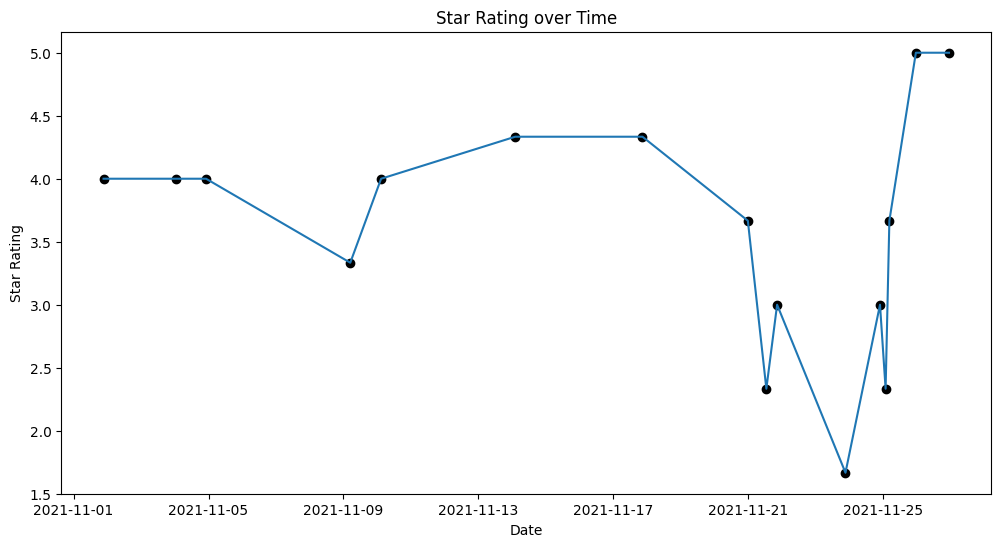

Text(0.5, 1.0, 'Average Star Rating per App Version Code')

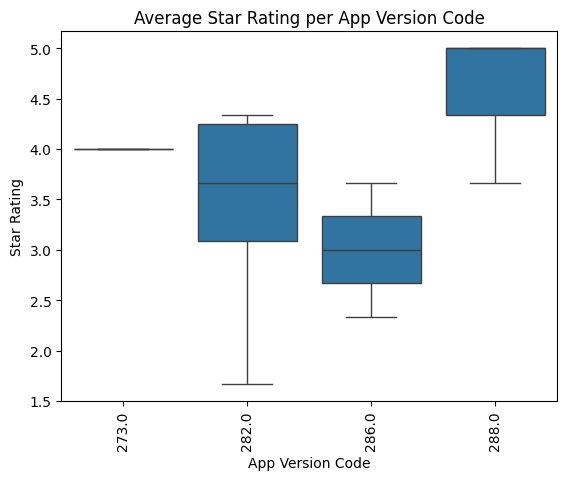

In [138]:
# We want to look for a big change in crashes (going up)

# Calculate the percentage change in crashes in 3 days (rolling), first create a new column
df_crash["Crashes_last_3_days"] = df_crash["Daily Crashes"].rolling(window=3).sum()

# Calculate the percentage change in crashes
df_crash["Crashes Change"] = df_crash["Crashes_last_3_days"].pct_change()

# Find the date with the biggest change
biggest_change_date = df_crash.loc[df_crash["Crashes Change"].idxmax()]["Date"]

# Find the biggest change
biggest_change = df_crash["Crashes Change"].max()

print(f"{biggest_change * 100}% change on", biggest_change_date)

# find the biggest increase in total negative reviews
df_reviews = reviews_df.copy()
print(df_reviews.columns)
df_reviews["Date"] = pd.to_datetime(df_reviews["Review Submit Date and Time"])
# df_reviews["Total Negative Reviews"] = df_reviews["Negative Reviews"].rolling(window=3).sum()
# df_reviews["Negative Reviews Change"] = df_reviews["Total Negative Reviews"].pct_change()
# biggest_change_date = df_reviews.loc[df_reviews["Negative Reviews Change"].idxmax()]["Date"]
# biggest_change = df_reviews["Negative Reviews Change"].max()
# print(f"{biggest_change * 100}% change on", biggest_change_date)
df_reviews.head()
# use sns to plot the reviews (Star Rating) over time
import seaborn as sns
import matplotlib.pyplot as plt

df_reviews["Date"] = pd.to_datetime(df_reviews["Review Submit Date and Time"])
df_reviews["Star Rating"] = df_reviews["Star Rating"].astype(int)

# smooth out the data, rolling mean over 3 days
df_reviews["Star Rating"] = df_reviews["Star Rating"].rolling(window=3).mean()

# remove everything befor 2021
df_reviews = df_reviews[(df_reviews["Date"] > "2021-11-01") & (df_reviews["Date"] < "2021-12-01")]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_reviews, x="Date", y="Star Rating")

# plot the points
plt.scatter(df_reviews["Date"], df_reviews["Star Rating"], color="black")

plt.title("Star Rating over Time")
plt.show()

# plot average star rating per by App Version Code
df_reviews["App Version Code"] = df_reviews["App Version Code"]

sns.boxplot(data=df_reviews, x="App Version Code", y="Star Rating")
plt.xticks(rotation=90)
plt.title("Average Star Rating per App Version Code")



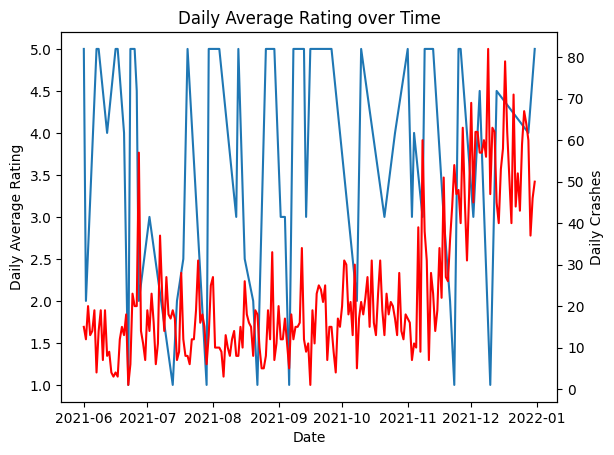

In [150]:
df = ratings_overview_df.copy()
# convert date to datetime
df["Date"] = pd.to_datetime(df["Date"])
# sort by date
df = df.sort_values(by="Date")

# add rolling average rating
# df["Daily Average Rating"] = df["Total Average Rating"].rolling(window=3).mean()
# rolling average over 3 days

# plot the daily average rating over time
sns.lineplot(data=df, x="Date", y="Daily Average Rating")
plt.title("Daily Average Rating over Time")
# add another line with the daily crash count
plt.twinx()
sns.lineplot(data=df_crash, x="Date", y="Daily Crashes", color="red")
plt.show()

# Spatial data

In [13]:
df_ratings = ratings_country_df.copy()
df_ratings["Date"] = pd.to_datetime(df_ratings["Date"])
df_ratings = df_ratings.groupby(df_ratings["Country"])["Total Average Rating"].mean()

# get the lat and lon for each country
import geopandas as gpd
lat_long_country = pd.read_csv("./data/longlat.csv")

# Convert latitude and longitude to numeric, coercing errors to NaN
lat_long_country["latitude"] = pd.to_numeric(lat_long_country["latitude"], errors='coerce')
lat_long_country["longitude"] = pd.to_numeric(lat_long_country["longitude"], errors='coerce')

# Drop rows with NaN values
lat_long_country.dropna(subset=["latitude", "longitude"], inplace=True)

lat_long_country.head()

# # convert lat and lon to web mercator
from pyproj import Proj, transform

inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3857')

lat_long_country["longitude"], lat_long_country["latitude"] = transform(inProj, outProj, lat_long_country["longitude"].values, lat_long_country["latitude"].values)

from bokeh.plotting import figure

p = figure(x_range=(-2000000, 6000000), y_range=(-1000000, 7000000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile("CARTODBPOSITRON")

# Show the plot
show(p)




/Users/manuel/Programmeren/School/Assignment 1 attached files 19 February 2025 1622/.venv/lib/python3.13/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/manuel/Programmeren/School/Assignment 1 attached files 19 February 2025 1622/.venv/lib/python3.13/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/bl/0xp3c78j1gs_14t9fbtq2g3m0000gn/T/ipykernel_20843/301

In [14]:
df_ratings = ratings_country_df.copy()
df_ratings["Date"] = pd.to_datetime(df_ratings["Date"])
df_ratings = df_ratings.groupby(df_ratings["Country"])["Total Average Rating"].mean()
# rename Total Average Rating to rating
df_ratings = df_ratings.rename("rating")

# get the lat and lon for each country
lat_long_country = pd.read_csv("./data/longlat.csv")

# Convert latitude and longitude to numeric, coercing errors to NaN
lat_long_country["latitude"] = pd.to_numeric(lat_long_country["latitude"], errors='coerce')
lat_long_country["longitude"] = pd.to_numeric(lat_long_country["longitude"], errors='coerce')

# Drop rows with NaN values
lat_long_country.dropna(subset=["latitude", "longitude"], inplace=True)

from pyproj import Proj, transform

inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3857')

lat_long_country["longitude"], lat_long_country["latitude"] = transform(inProj, outProj, lat_long_country["longitude"].values, lat_long_country["latitude"].values)


# merge the dataframes
lat_long_country = pd.merge(lat_long_country, df_ratings, left_on="country", right_index=True)
lat_long_country["color"] = (lat_long_country["rating"] - lat_long_country["rating"].min()) / (lat_long_country["rating"].max() - lat_long_country["rating"].min())
lat_long_country["color"] = (lat_long_country["color"] * 255).astype(int)
lat_long_country["color"] = lat_long_country["color"].apply(lambda x: (255 - x, x, 0))

# amount of start from 0 to 5 using ⭐️ emoji
lat_long_country["stars"] = lat_long_country["rating"].apply(lambda x: "⭐️" * int(round(x)))


print(lat_long_country.head())

from bokeh.models import ColumnDataSource, HoverTool, LabelSet
from bokeh.plotting import figure, show

# Create a ColumnDataSource from your DataFrame
source = ColumnDataSource(lat_long_country)

# Create the figure
map = figure(x_range=(-4000000, 6000000), y_range=(-1000000, 7000000),
           x_axis_type="mercator", y_axis_type="mercator", width=800, height=600)

# Add the tile
map.add_tile("CARTODBPOSITRON")

# Add circle markers with hover capability
circles = map.scatter(x='longitude', y='latitude', size=10, 
                  source=source, fill_color='color', 
                  fill_alpha=0.8, line_color='white')

# Add HoverTool
hover = HoverTool(tooltips=[
    ('Country', '@country'),
    ('Name', '@name'),
    ('Rating', '@rating'),
    ('Stars', '@stars')
])

labels = LabelSet(x='longitude', y='latitude', text='name', x_offset=5, y_offset=5, source=source, border_line_color='black', background_fill_color='white')

map.add_layout(labels)
map.add_tools(hover)

# Show the plot
show(map)

   country      latitude     longitude                    name    rating  \
10      AR -4.638374e+06 -7.081776e+06               Argentina  4.200000   
12      AT  6.026747e+06  1.619707e+06                 Austria  3.834112   
13      AU -2.909486e+06  1.489178e+07               Australia  4.193551   
16      BA  5.452435e+06  1.968026e+06  Bosnia and Herzegovina  5.000000   
18      BD  2.715070e+06  1.005842e+07              Bangladesh  5.000000   

           color       stars  
10  (51, 204, 0)    ⭐️⭐️⭐️⭐️  
12  (75, 180, 0)    ⭐️⭐️⭐️⭐️  
13  (52, 203, 0)    ⭐️⭐️⭐️⭐️  
16   (0, 255, 0)  ⭐️⭐️⭐️⭐️⭐️  
18   (0, 255, 0)  ⭐️⭐️⭐️⭐️⭐️  


/Users/manuel/Programmeren/School/Assignment 1 attached files 19 February 2025 1622/.venv/lib/python3.13/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/manuel/Programmeren/School/Assignment 1 attached files 19 February 2025 1622/.venv/lib/python3.13/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/bl/0xp3c78j1gs_14t9fbtq2g3m0000gn/T/ipykernel_20843/343

In [177]:
df_ratings = ratings_country_df.copy()
df_ratings["Date"] = pd.to_datetime(df_ratings["Date"])
# plot the biggest change in rating for each country, use the min and max rating
df_ratings = df_ratings.groupby(df_ratings["Country"]).agg({"Total Average Rating": ["first", "last"]})
df_ratings.columns = df_ratings.columns.droplevel()
df_ratings["change"] = df_ratings["last"] - df_ratings["first"]
df_ratings = df_ratings.sort_values(by="change", ascending=False)

lat_long_country = pd.read_csv("./data/longlat.csv")
lat_long_country = lat_long_country[["country", "name"]]

# get the sales per country
df_sales = sales_df.copy()
# group by country and count the sales
df_sales = df_sales.groupby(df_sales["buyer country"]).size()
# rename the column
df_sales = df_sales.rename("sales")

# merge df_ratings with df_sales, if there are no sales, fill with 0
df_ratings = pd.merge(df_ratings, df_sales, left_index=True, right_index=True, how="left")
df_ratings["sales"] = df_ratings["sales"].fillna(0)

df_ratings = pd.merge(df_ratings, lat_long_country, left_index=True, right_on="country")
# set name as index
df_ratings.set_index("name", inplace=True)

print(df_ratings.head())

# plot in bokeh table
from bokeh.models import ColumnDataSource, DataTable, TableColumn

source = ColumnDataSource(df_ratings)

columns = [TableColumn(field="name", title="Country"),
              TableColumn(field="first", title="First Rating"),
              TableColumn(field="last", title="Last Rating"),
              TableColumn(field="change", title="Change")]

country_rating_change_table = DataTable(source=source, columns=columns, width=800, height=600)

# show(country_rating_change_table)

# key metrics (most positive and negative change in rating) and also get the change in percentage
df_ratings["change_percentage"] = (df_ratings["change"] / df_ratings["first"]) * 100
most_positive_change = df_ratings["change"].idxmax()
most_negative_change = df_ratings["change"].idxmin()
most_positive_change_percentage = df_ratings["change_percentage"].idxmax()
most_negative_change_percentage = df_ratings["change_percentage"].idxmin()
# plot these two numbers
from bokeh.models import Div

div = Div(text=f"""
<div style="background-color: #f0f0f0; padding: 10px; border-radius: 5px;">
<h1>⬆{df_ratings.loc[most_positive_change, "change_percentage"]:.2f}% change in {most_positive_change} ratings</h1>
</div>
""")

# create table with the countries with the top 10 best ratings and the top 10 worst ratings. First sort by last rating, then by sales
top_10_best = df_ratings.sort_values(by=["last", "sales"], ascending=False).head(10)
top_10_worst = df_ratings.sort_values(by=["last", "sales"], ascending=True).head(10)

source_best = ColumnDataSource(top_10_best)
source_worst = ColumnDataSource(top_10_worst)

columns = [TableColumn(field="name", title="Country"),
            TableColumn(field="last", title="Rating"),
            TableColumn(field="sales", title="Sales")]                

best_table = DataTable(source=source_best, columns=columns, width=400)
worst_table = DataTable(source=source_worst, columns=columns, width=400)


# TODO: add title



# <h1>Most Negative Change in Rating</h1>
# <p>Country: {most_negative_change}</p>
# <p>Change: {df_ratings.loc[most_negative_change, "change"]}</p>
# <p>Change Percentage: {df_ratings.loc[most_negative_change, "change_percentage"]:.2f}%</p>

# <h1>Most Positive Change in Rating Percentage</h1>
# <p>Country: {most_positive_change_percentage}</p>
# <p>Change: {df_ratings.loc[most_positive_change_percentage, "change"]}</p>
# <p>Change Percentage: {df_ratings.loc[most_positive_change_percentage, "change_percentage"]:.2f}%</p>
# <h1>Most Negative Change in Rating Percentage</h1>
# <p>Country: {most_negative_change_percentage}</p>
# <p>Change: {df_ratings.loc[most_negative_change_percentage, "change"]}</p>
# <p>Change Percentage: {df_ratings.loc[most_negative_change_percentage, "change_percentage"]:.2f}%</p>

country_kpis = row(
    KPI(f"⬆{df_ratings.loc[most_positive_change, "change_percentage"]:.2f}% change in {most_positive_change} ratings"),
    KPI(f"⬇{df_ratings.loc[most_negative_change, "change_percentage"]:.2f}% change in {most_negative_change} ratings"),
)

show(column(country_kpis, row(best_table, worst_table)))


           first  last  change  sales country
name                                         
Indonesia   4.55  4.58    0.03    8.0      ID
France      4.50  4.53    0.03   11.0      FR
Canada      4.12  4.13    0.01  162.0      CA
Australia   4.19  4.20    0.01   59.0      AU
Germany     4.15  4.16    0.01   64.0      DE


# Layout

In [82]:
title = Div(text="<h1 style='color: blue;'>Dashboard: D&D</h2>", width=700)

# map column:
geographics_map_column = column(country_kpis, map, country_rating_change_table)

tab1 = TabPanel(child = column(revenue, sales_growth_data_table), title = "Sales Panel")
tab2 = TabPanel(child = review, title = "Review Panel")
tab3 = TabPanel(child = geographics_map_column, title = "Geograpics")

tabs_object = Tabs(tabs = [tab1, tab2, tab3])
layout = column(title, tabs_object)

# layout = column(title, revenue, review)


# save to html
from bokeh.io import output_file
output_file("dashboard.html")
show(layout)